In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [318]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,Company,Job title,Location,Employees,comp_age,Company type,Company industry,Company sector,Career opportunities,Comp & Benefits,...,STATA_yn,SPSS_yn,spark_yn,sql_yn,excel_yn,aws_yn,jupyter_yn,description_length,simplified_jobs,seniority_jobs
0,DaVita,Senior Legal Counsel - Data Privacy,"London, England",10000.0,29.0,Company - Public,Healthcare Services & Hospitals,Healthcare,3.4,3.2,...,0,0,0,0,1,1,1,510,other data,snr
1,Catch22,Data Administrator – Contractual Governance,"London, England",3000.0,235.0,Non-profit Organisation,"Civic, Welfare & Social Services",Non-profit & NGO,3.6,3.1,...,0,0,0,0,1,0,0,806,other data,jr
2,Haver Analytics,Economic Data Manager,"London, England",125.0,45.0,Company - Private,Business Consulting,Management & Consulting,2.7,3.1,...,0,0,0,0,1,0,0,270,economist,snr
3,Network Homes,Reports and Data Officer (12 Month Maternity C...,"Hertford, England",750.0,7.0,Company - Private,Construction,"Construction, Repair & Maintenance Services",3.5,3.7,...,0,0,0,0,1,0,0,519,other data,NaN
4,Adeccogroup,Data Visualisation Manager (Hybrid/Remote),"London, England",10000.0,NaN,Company - Public,HR Consulting,Human Resources & Staffing,3.6,3.3,...,0,0,0,0,1,0,0,722,other data,snr


In [319]:
# Drop outliers found in eda
df.drop(index=df.salary_thousands[df.salary_thousands<10].index, inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1842 entries, 0 to 1843
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1842 non-null   object 
 1   Job title             1842 non-null   object 
 2   Location              1824 non-null   object 
 3   Employees             1654 non-null   float64
 4   comp_age              1461 non-null   float64
 5   Company type          1739 non-null   object 
 6   Company industry      1574 non-null   object 
 7   Company sector        1574 non-null   object 
 8   Career opportunities  1579 non-null   float64
 9   Comp & Benefits       1579 non-null   float64
 10  Culture & Values      1579 non-null   float64
 11  Senior Management     1579 non-null   float64
 12  Work/Life Balance     1579 non-null   float64
 13  Description           1842 non-null   object 
 14  comp_rate             1588 non-null   float64
 15  em_provided_est      

In [151]:
df.describe()

,Employees,comp_age,Career opportunities,Comp & Benefits,Culture & Values,Senior Management,Work/Life Balance,comp_rate,em_provided_est,salary_thousands,...,python_yn,R_yn,STATA_yn,SPSS_yn,spark_yn,sql_yn,excel_yn,aws_yn,jupyter_yn,description_length
count,1654.000000,1461.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1588.000000,1842.000000,1842.000000,...,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000
mean,3765.643894,58.464750,3.687650,3.654148,3.835529,3.583534,3.710450,3.885957,0.557003,61.673157,...,0.452769,0.074919,0.007058,0.007600,0.056460,0.354506,0.561346,0.147666,0.147666,592.048860
std,4270.429854,70.524714,0.523787,0.528180,0.529196,0.579001,0.542291,0.471879,0.496875,31.519622,...,0.497899,0.263331,0.083735,0.086872,0.230871,0.478493,0.496357,0.354865,0.354865,308.871996
min,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,125.000000,11.000000,3.400000,3.400000,3.600000,3.200000,3.400000,3.700000,0.000000,41.533750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,341.250000
50%,750.000000,27.000000,3.700000,3.700000,3.900000,3.500000,3.700000,3.900000,1.000000,57.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,565.000000
75%,10000.000000,77.000000,4.000000,4.000000,4.100000,3.900000,4.000000,4.200000,1.000000,66.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,780.000000
max,10000.000000,346.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,300.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3294.000000


<AxesSubplot:>

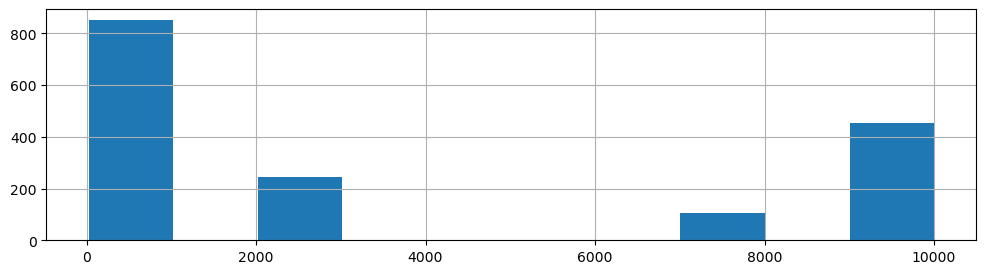

In [131]:
df['Employees'].hist(figsize=(12,3))

<AxesSubplot:>

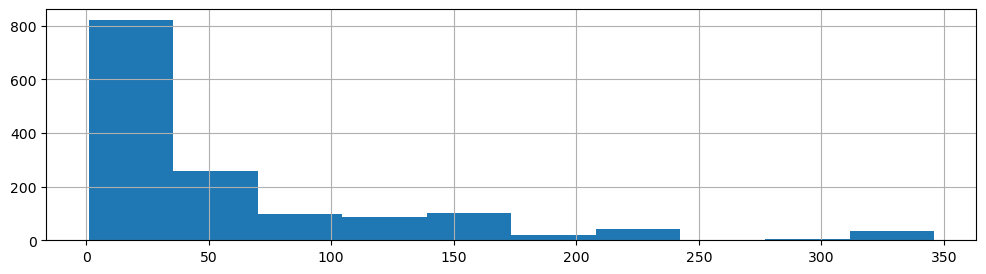

In [132]:
df['comp_age'].hist(figsize=(12,3))

In [146]:
df['salary_thousands'].value_counts().sort_index(ascending=False)

300.0000     1
243.7500     1
188.9160     1
182.8125     1
175.5000     1
            ..
20.5700      1
20.0000      1
18.0000     30
9.7500       1
6.0000       1
Name: salary_thousands, Length: 301, dtype: int64

<AxesSubplot:>

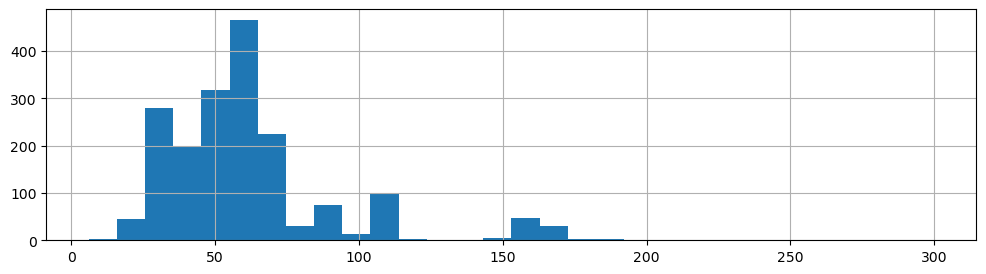

In [136]:
df['salary_thousands'].hist(figsize=(12,3), bins=30)

In [145]:
df['revenue'][df['revenue']>0].value_counts().sort_index()

1.0         25
3.0         34
15.0        78
37.0        89
300.0      100
750.0       65
3000.0     155
7000.0      49
10000.0    294
Name: revenue, dtype: int64

<AxesSubplot:>

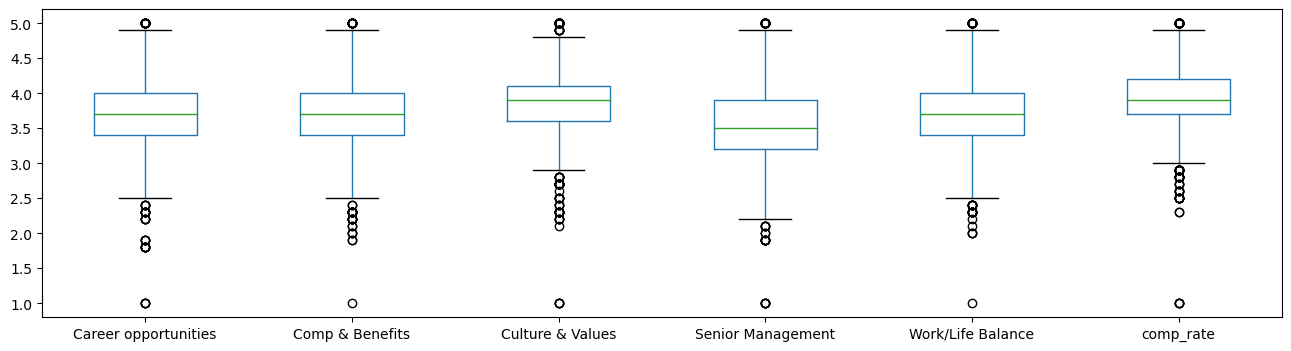

In [93]:
df.boxplot(grid=False,figsize=(16,4), column= ['Career opportunities','Comp & Benefits','Culture & Values','Senior Management','Work/Life Balance','comp_rate'])

<AxesSubplot:>

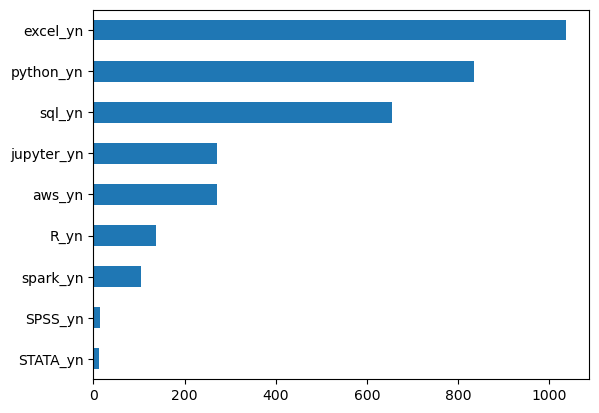

In [119]:
(df[['python_yn','R_yn','STATA_yn','SPSS_yn','spark_yn','sql_yn','excel_yn','aws_yn','jupyter_yn']].sum().sort_values()).plot(kind='barh')

<AxesSubplot:>

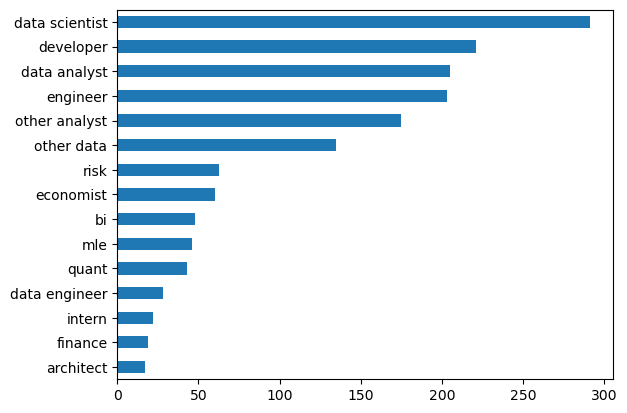

In [172]:
df['simplified_jobs'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

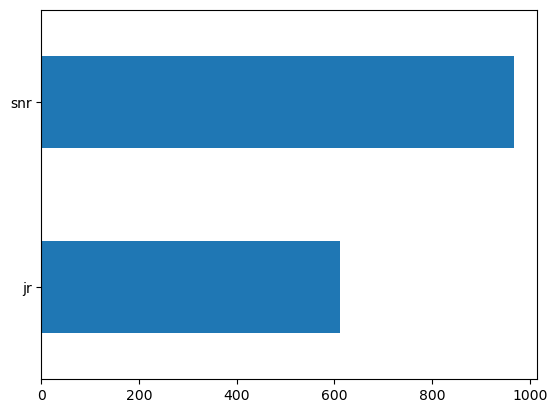

In [174]:
df['seniority_jobs'].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

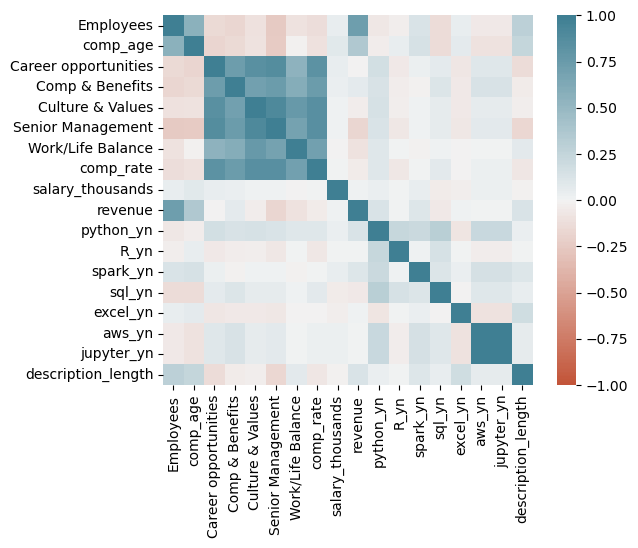

In [160]:
sns.heatmap(
    df.drop(columns=['em_provided_est','STATA_yn','SPSS_yn']).corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

# Pivot tables

In [279]:
df.simplified_jobs.value_counts()

data scientist    291
developer         221
data analyst      205
engineer          203
other analyst     175
other data        135
risk               63
economist          60
bi                 48
mle                46
quant              43
data engineer      28
intern             22
finance            19
architect          17
Name: simplified_jobs, dtype: int64

In [180]:
pd.pivot_table(df, index = ['seniority_jobs'], values= 'salary_thousands')

,salary_thousands
seniority_jobs,
jr,57.741837
snr,63.314267


In [191]:
pd.pivot_table(df, index = ['simplified_jobs'], values= 'salary_thousands').reindex().sort_values(by='salary_thousands',ascending=False)

,salary_thousands
simplified_jobs,
intern,88.303818
economist,87.358383
architect,83.092588
developer,73.394554
data engineer,71.186250
finance,68.415842
mle,65.744630
quant,64.610930
risk,62.292333


In [238]:
pd.pivot_table(df, index = ['simplified_jobs','seniority_jobs'], values= 'salary_thousands')

salary_thousands
simplified_jobs seniority_jobs                  
architect       snr                    83.092588
bi              jr                     57.943143
                snr                    63.285185
data analyst    jr                     57.203959
                snr                    54.442739
data engineer   snr                    71.186250
data scientist  jr                     54.837240
                snr                    61.026512
developer       snr                    73.394554
economist       jr                     86.923077
                snr                    69.057895
engineer        jr                     44.344500
                snr                    59.715568
finance         jr                     79.700000
                snr                    60.717600
intern          jr                     95.538000
                snr                    55.750000
mle             jr                     50.000000
                snr                    69.633464
other analyst   jr                     55.332663
                snr                    56.162784
other data      jr                     53.215870
                snr                    67.487150
quant           jr                     60.207259
risk            jr                     61.686182
                snr                    60.506067

In [219]:
# Check to see why interns are paid so much
#df[df['simplified_jobs']=='intern'].drop(columns=df.columns[8:16]).drop(columns=df.columns[18:27])

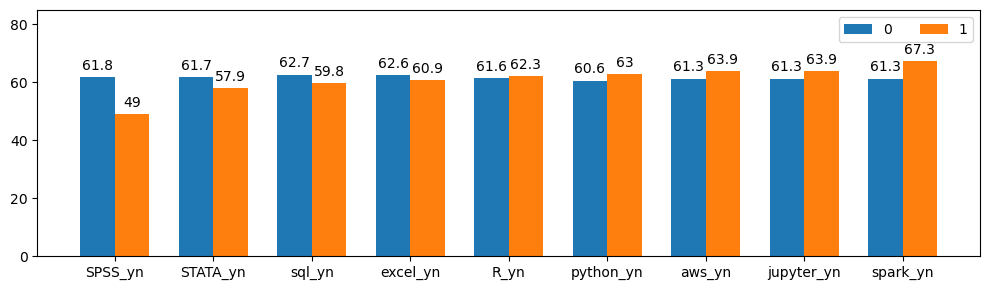

In [559]:
skills = pd.DataFrame()#pd.pivot_table(df, index='python_yn', values='salary_thousands').rename(columns={'salary_thousands':'python_yn'}).rename_axis(None)
for i in df.columns[18:27]:
    skills[i] = pd.pivot_table(df, index=i, values='salary_thousands').rename(columns={'salary_thousands':i}).rename_axis(None)
skills = skills.sort_values(axis=1,by=1).round(1)
fig, ax = plt.subplots(figsize=(10,3))
width = 0.35
x = np.arange(len(skills.columns))
rects1 = ax.bar(x - width/2, skills.iloc[0].values, width, label='0')
rects2 = ax.bar(x + width/2, skills.iloc[1].values, width, label='1')

ax.legend(ncol=2)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_ylim(top=85)
ax.set_xticks(x, skills.columns)
fig.tight_layout()

plt.show()

In [534]:
skills.iloc[0].values

array([60.58979812, 61.62174237, 61.6996982 , 61.76994256, 61.33510213,
       62.6900471 , 62.61574752, 61.28661401, 61.28661401])

In [222]:
df['Company type'].value_counts()

Company - Private                 980
Company - Public                  599
Non-profit Organisation            47
Subsidiary or Business Segment     40
Government                         37
College / University               14
Self-employed                       7
Private Practice / Firm             6
Unknown                             5
Contract                            3
Hospital                            1
Name: Company type, dtype: int64

In [277]:
pd.pivot_table(df, index='Company type', values='salary_thousands').sort_values(by='salary_thousands', ascending=False)

,salary_thousands
Company type,
Private Practice / Firm,100.098333
Self-employed,90.857143
College / University,72.770500
Company - Public,65.102925
Company - Private,59.895851
Subsidiary or Business Segment,59.136025
Contract,58.500000
Non-profit Organisation,56.647170
Government,53.489595


In [276]:
pd.pivot_table(df[~df['Company industry'].isin(df['Company industry'].
               value_counts()[df['Company industry'].value_counts()<20].index.tolist())],
               index='Company industry', values='salary_thousands').sort_values(by='salary_thousands', ascending=False)

,salary_thousands
Company industry,
Research & Development,76.752174
Banking & Lending,72.795740
Accounting & Tax,67.655417
Investment & Asset Management,66.438035
"Department, Clothing & Shoe Stores",64.069667
HR Consulting,62.709919
Insurance Carriers,61.752608
Energy & Utilities,61.657206
Financial Transaction Processing,61.647976


In [278]:
pd.pivot_table(df[~df['Company sector'].isin(df['Company sector'].
               value_counts()[df['Company sector'].value_counts()<20].index.tolist())],
               index='Company sector', values='salary_thousands').sort_values(by='salary_thousands', ascending=False)

,salary_thousands
Company sector,
Finance,66.506738
Human Resources & Staffing,63.083364
"Energy, Mining, Utilities",62.021937
Information Technology,61.491140
Retail & Wholesale,60.891831
Insurance,60.199702
Management & Consulting,59.716533
Healthcare,59.479311
Media & Communication,59.145882


In [281]:
df.columns

Index(['Company', 'Job title', 'Location', 'Employees', 'comp_age',
       'Company type', 'Company industry', 'Company sector',
       'Career opportunities', 'Comp & Benefits', 'Culture & Values',
       'Senior Management', 'Work/Life Balance', 'Description', 'comp_rate',
       'em_provided_est', 'salary_thousands', 'revenue', 'python_yn', 'R_yn',
       'STATA_yn', 'SPSS_yn', 'spark_yn', 'sql_yn', 'excel_yn', 'aws_yn',
       'jupyter_yn', 'description_length', 'simplified_jobs',
       'seniority_jobs'],
      dtype='object')

In [286]:
pd.pivot_table(df[df['simplified_jobs']=='risk'], index='seniority_jobs', values='salary_thousands').sort_values(by='salary_thousands', ascending=False)

,salary_thousands
seniority_jobs,
jr,61.686182
snr,60.506067


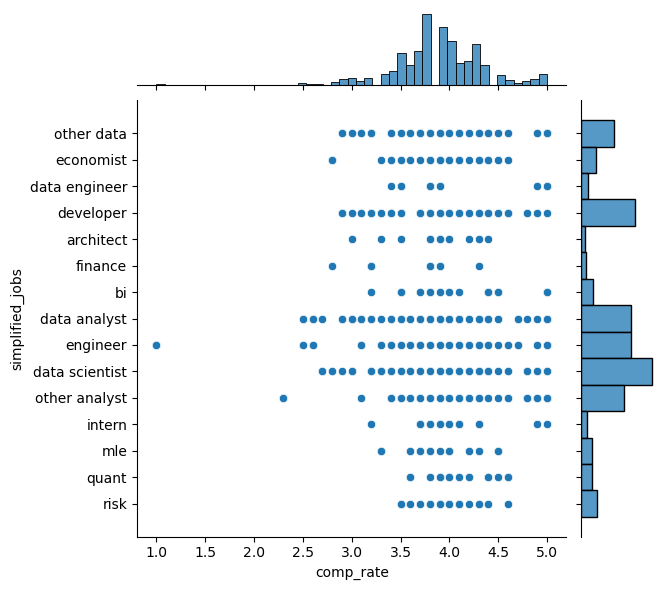

In [288]:
sns.jointplot(data=df, y='simplified_jobs', x='comp_rate')

In [419]:
a = px.line_polar(jobs_rank_comp.loc['data scientist'], r=jobs_rank_comp.loc['data scientist'].values, theta=jobs_rank_comp.loc['data scientist'].index, line_close=True, range_r=[0,5]).update_layout(
    autosize=False,
    width=400,
    height=400, title_text='data scientist', title_x =0.5)
a

C:\Users\44756\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [420]:
b = px.line_polar(jobs_rank_comp.loc['data analyst'], r=jobs_rank_comp.loc['data analyst'].values, theta=jobs_rank_comp.loc['data analyst'].index, line_close=True, range_r=[0,5]).update_layout(
    autosize=False,
    width=400,
    height=400, title_text='data analyst', title_x =0.5)
b

C:\Users\44756\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:ylabel='simplified_jobs'>

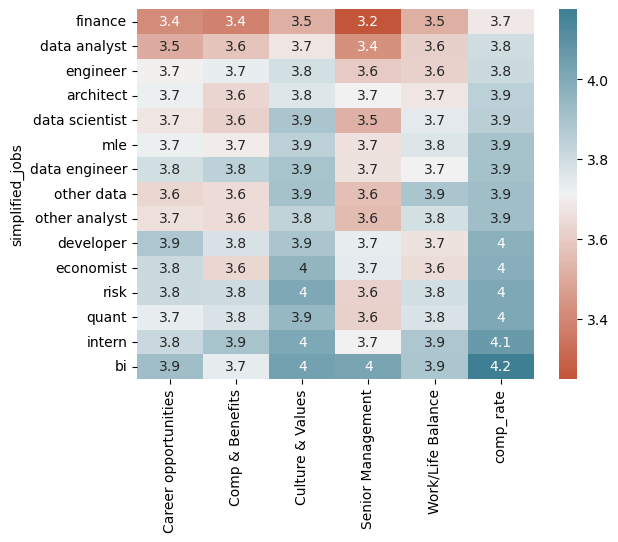

In [418]:
sns.heatmap(jobs_rank_comp.sort_values(by='comp_rate'), cmap=sns.diverging_palette(20, 220, n=200), annot=True)

graph for simplified_jobs: total = 15


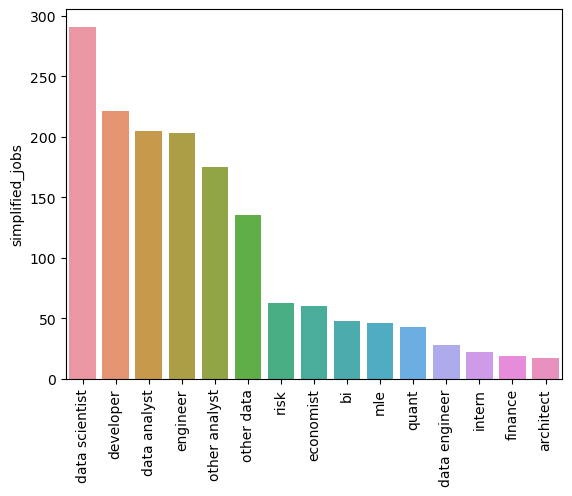

graph for seniority_jobs: total = 2


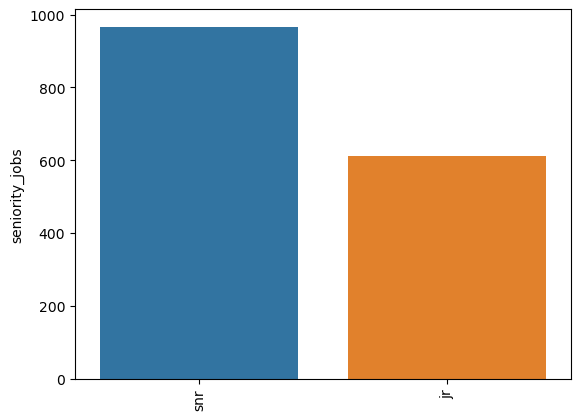

graph for Company type: total = 11


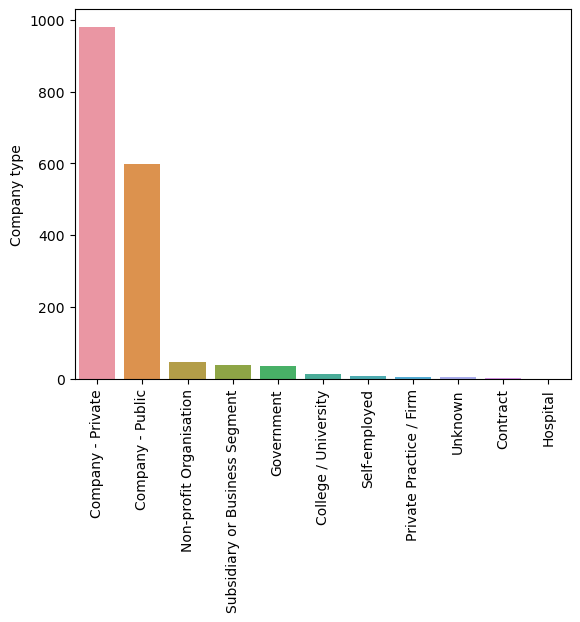

graph for Company industry: total = 73


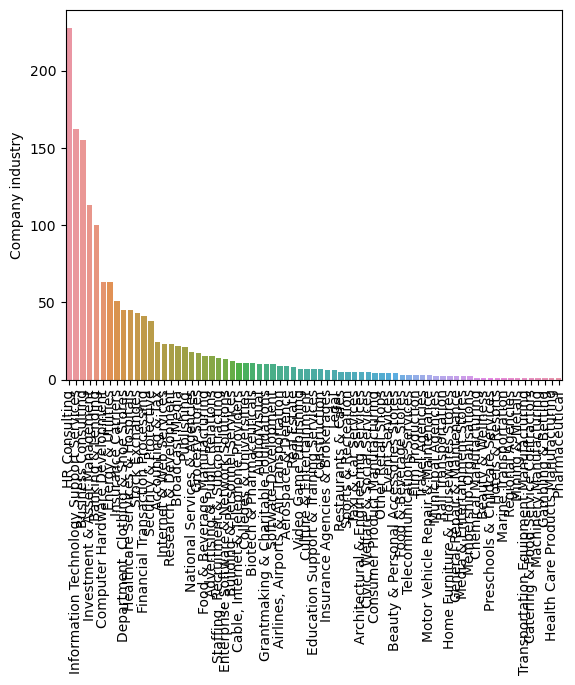

graph for Company sector: total = 24


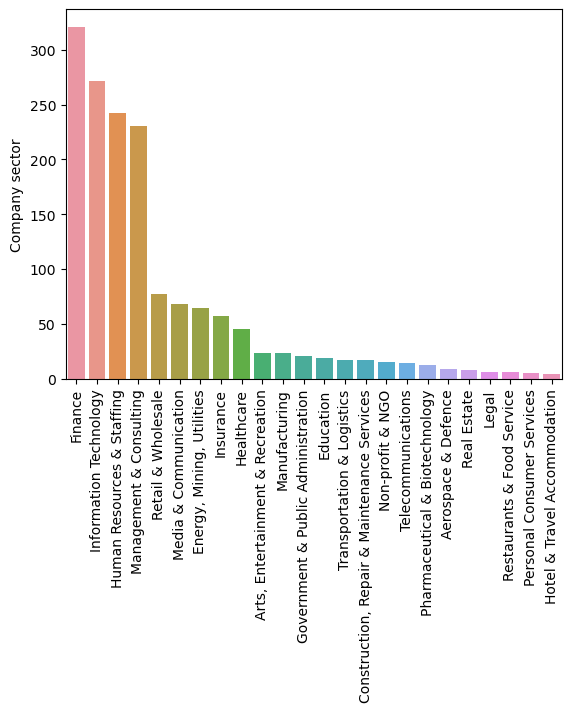

graph for Employees: total = 7


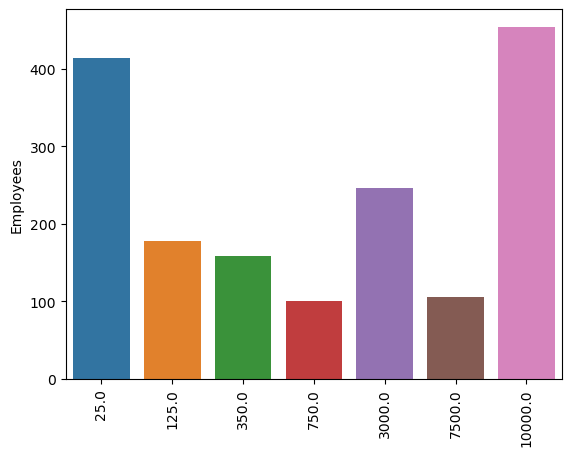

graph for python_yn: total = 2


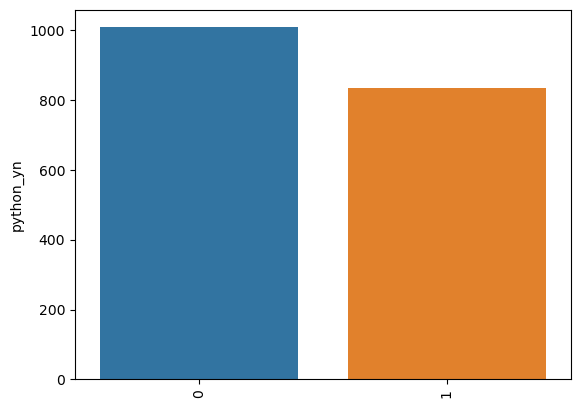

graph for sql_yn: total = 2


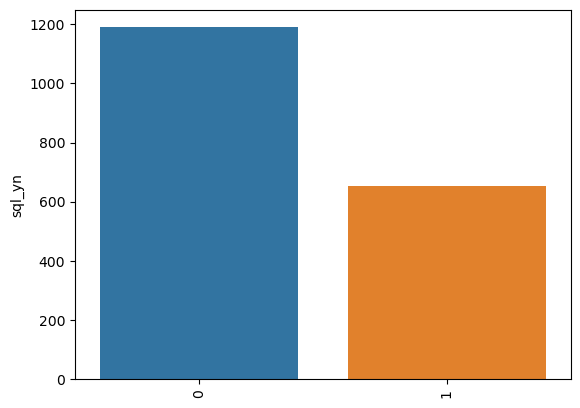

graph for aws_yn: total = 2


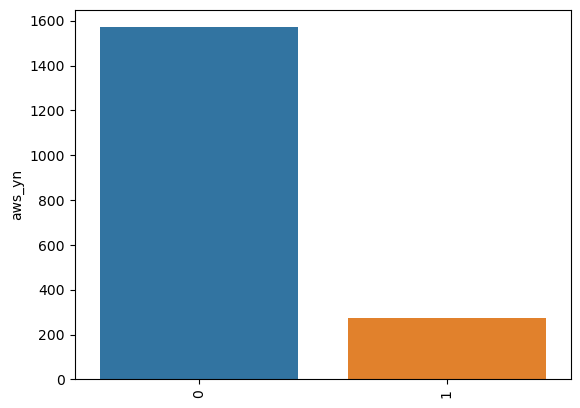

graph for jupyter_yn: total = 2


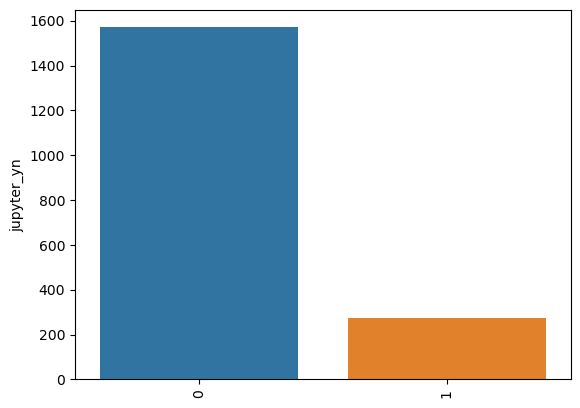

graph for excel_yn: total = 2


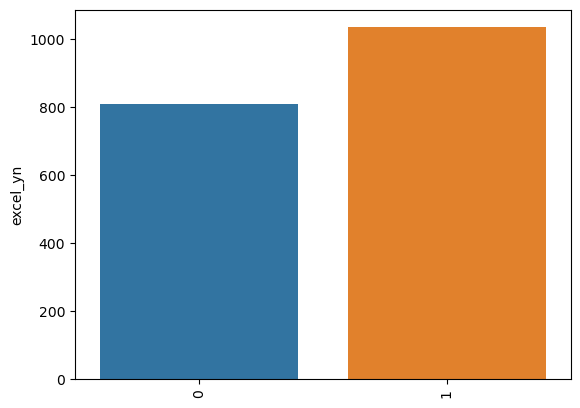

In [561]:
df_cat = df[['simplified_jobs','seniority_jobs','Company type','Company industry','Company sector','Employees','python_yn','sql_yn','aws_yn','jupyter_yn','excel_yn']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

# Word Cloud

In [568]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\44756\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


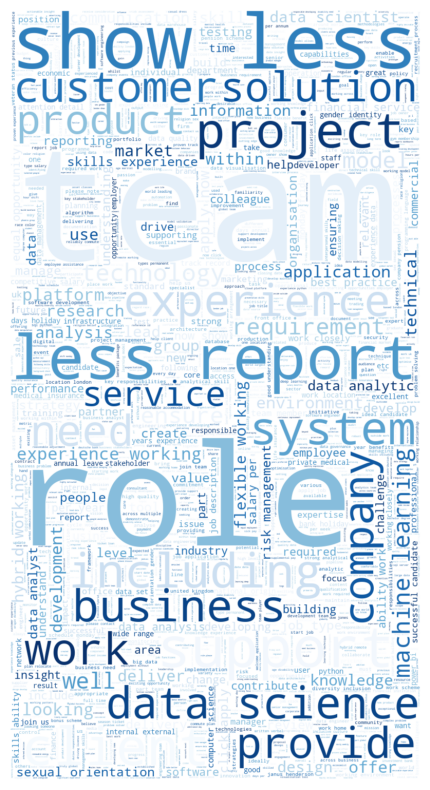

In [570]:
words = " ".join(df['Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white",colormap="Blues", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

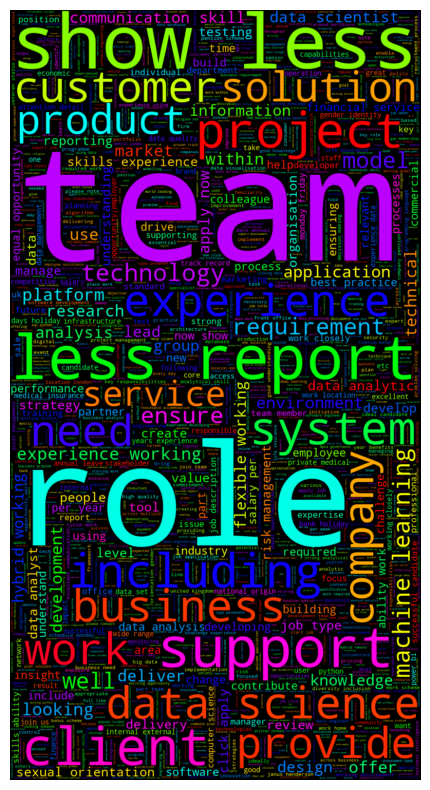

In [571]:
words = " ".join(df['Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="black",colormap="gist_rainbow_r", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()